# This model predicts whether or not it will rain in Australia tomorrow.

In [ ]:
# Key Takeaways from the model:

# The model is 85% accurate.
# It will mostly likely not rain in Australia tomorrow. 

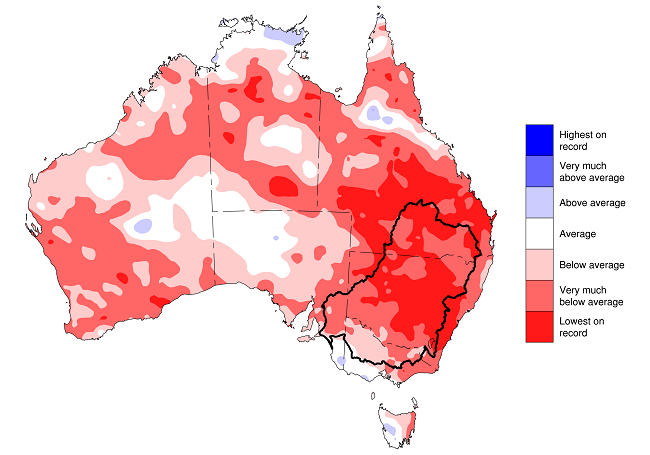

In [1]:
from IPython.display import Image
Image(filename='rain.png', width = 500, height = 200)

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [4]:
# Columns in the dataset. There are 24 columns in total. So it makese sense to drop some of the columns and keep 
# some of the columns so it's easier to analyze the data.
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [5]:
df.describe(include='all')

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
count,142193,142193,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132863,132923.000000,132180,...,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,140787,142193.000000,142193
unique,3436,49,NaN,NaN,NaN,NaN,NaN,16,NaN,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2
top,2013-06-24,Canberra,NaN,NaN,NaN,NaN,NaN,W,NaN,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,No
freq,49,3418,NaN,NaN,NaN,NaN,NaN,9780,NaN,11393,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109332,NaN,110316
mean,NaN,NaN,12.186400,23.226784,2.349974,5.469824,7.624853,NaN,39.984292,NaN,...,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,NaN,2.360682,NaN
std,NaN,NaN,6.403283,7.117618,8.465173,4.188537,3.781525,NaN,13.588801,NaN,...,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,NaN,8.477969,NaN
min,NaN,NaN,-8.500000,-4.800000,0.000000,0.000000,0.000000,NaN,6.000000,NaN,...,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,NaN,0.000000,NaN
25%,NaN,NaN,7.600000,17.900000,0.000000,2.600000,4.900000,NaN,31.000000,NaN,...,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,NaN,0.000000,NaN
50%,NaN,NaN,12.000000,22.600000,0.000000,4.800000,8.500000,NaN,39.000000,NaN,...,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,NaN,0.000000,NaN
75%,NaN,NaN,16.800000,28.200000,0.800000,7.400000,10.600000,NaN,48.000000,NaN,...,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,NaN,0.800000,NaN


In [6]:
# Dropping the Location column as it has too many unique values.
del df['Location']
df.head(1)

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No


In [21]:
# Mapping categorical variables in RainTomorrow column.
# No = 0 and Yes = 1
df.replace(to_replace={'RainTomorrow': {'No': 0, 'Yes': 1}}, inplace=True)

In [34]:
# Mapping categorical variables in RainToday column.
# No = 0 and Yes = 1
df.replace(to_replace={'RainToday': {'No': 0, 'Yes': 1}}, inplace=True)

In [67]:
df.dtypes

Date              object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday        float64
RISK_MM          float64
RainTomorrow       int64
dtype: object

In [68]:
# Dropping these columns as they have too many unique values. 
del df['Date']
del df['WindGustDir']
del df['WindDir9am']
del df['WindDir3pm']

In [69]:
# The person who uploaded this dataset onto Kaggle.com, recommended dropping this column.
del df['RISK_MM']

In [49]:
from sklearn.model_selection import train_test_split

In [70]:
X = df.drop('RainTomorrow', axis = 1)
y = df['RainTomorrow']

In [74]:
# Evaporation, Sunshine, Cloud9am, and Cloud3pm columns have many missing values. 
df.count()

MinTemp          141556
MaxTemp          141871
Rainfall         140787
Evaporation       81350
Sunshine          74377
WindGustSpeed    132923
WindSpeed9am     140845
WindSpeed3pm     139563
Humidity9am      140419
Humidity3pm      138583
Pressure9am      128179
Pressure3pm      128212
Cloud9am          88536
Cloud3pm          85099
Temp9am          141289
Temp3pm          139467
RainToday        140787
RainTomorrow     142193
dtype: int64

In [75]:
# Dropping rows with missing values.
df2 = df.dropna()

In [77]:
X = df2.drop('RainTomorrow', axis = 1)
y = df2['RainTomorrow']

In [78]:
# Below is the code to create the test data. We’re taking 30% of the train data to create the test data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
from sklearn.linear_model import LogisticRegression

In [79]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)

C:\Users\Yash\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [80]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [81]:
confusion_matrix(y_test, predictions) #Confusion matrix.

array([[12858,   766],
       [ 1825,  1978]], dtype=int64)

In [82]:
# When we drop missing rows in the Evaporation, Sunshine, Cloud9am, and Cloud3pm columns our model is 85% accurate.
# No = 0 and Yes = 1
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     13624
           1       0.72      0.52      0.60      3803

    accuracy                           0.85     17427
   macro avg       0.80      0.73      0.76     17427
weighted avg       0.84      0.85      0.84     17427



In [83]:
# Creating a model with the Evaporation, Sunshine, Cloud9am, and Cloud3pm columns removed. 
df2 = df
df2.count()

MinTemp          141556
MaxTemp          141871
Rainfall         140787
Evaporation       81350
Sunshine          74377
WindGustSpeed    132923
WindSpeed9am     140845
WindSpeed3pm     139563
Humidity9am      140419
Humidity3pm      138583
Pressure9am      128179
Pressure3pm      128212
Cloud9am          88536
Cloud3pm          85099
Temp9am          141289
Temp3pm          139467
RainToday        140787
RainTomorrow     142193
dtype: int64

In [84]:
del df2['Evaporation']
del df2['Sunshine']
del df2['Cloud9am']
del df2['Cloud3pm']

In [85]:
df2.count()

MinTemp          141556
MaxTemp          141871
Rainfall         140787
WindGustSpeed    132923
WindSpeed9am     140845
WindSpeed3pm     139563
Humidity9am      140419
Humidity3pm      138583
Pressure9am      128179
Pressure3pm      128212
Temp9am          141289
Temp3pm          139467
RainToday        140787
RainTomorrow     142193
dtype: int64

In [88]:
df3 = df2.dropna()

In [89]:
X = df3.drop('RainTomorrow', axis = 1)
y = df3['RainTomorrow']

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
from sklearn.linear_model import LogisticRegression

In [91]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)

C:\Users\Yash\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [92]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [93]:
confusion_matrix(y_test, predictions) #Confusion matrix.

array([[26538,  1400],
       [ 4097,  3842]], dtype=int64)

In [94]:
# When we drop the columns Evaporation, Sunshine, Cloud9am, and Cloud3pm our model is still 85% accurate.
# No = 0 and Yes = 1
# It will likely not rain tomorrow in Austrailia. 
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     27938
           1       0.73      0.48      0.58      7939

    accuracy                           0.85     35877
   macro avg       0.80      0.72      0.74     35877
weighted avg       0.84      0.85      0.83     35877

